1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [7]:
import pandas as pd

file_path = '../Homework/data/2023_6/open_rank_20236.csv'
df = pd.read_csv(file_path)

us_projects = df.sort_values(by='value', ascending=False).head(100)

max_value = us_projects['value'].max()
min_value = us_projects['value'].min()
mean_value = us_projects['value'].mean()
median_value = us_projects['value'].median()

print(f"Max value: {max_value}")
print(f"Min value: {min_value}")
print(f"Mean value: {mean_value}")
print(f"Median value: {median_value}")


Max value: 1394.45
Min value: 200.68
Mean value: 346.9679
Median value: 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [23]:
import pandas as pd

file_path = 'data/2022/activity_2022.csv'
df = pd.read_csv(file_path)
df = df.drop('repo', axis = 1)

# 计算每行的平均值并存储在新的列中
df['row_mean'] = df.mean(axis=1)

print(df['row_mean'])



0    3131.895833
1    4437.202500
2    2461.990000
3    2389.145833
4    2673.642500
5    3148.264167
6    4066.018333
7    3711.075000
8    2559.278333
9    2293.934167
Name: row_mean, dtype: float64


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [27]:
import pandas as pd

file_path_china = 'data/2022/china_2022.csv'
df_china = pd.read_csv(file_path_china)

file_path_global = 'data/2022/global_2022.csv'
df_grobal = pd.read_csv(file_path_china)

df_china_mean = df_china.drop('name', axis = 1).mean()
df_global_mean = df_grobal.drop('name', axis = 1).mean()

for i in range(9):
    if(df_china_mean[i] > df_global_mean[i]):
        print(f'{df_global_mean.index[i]}方面：中国开源领域领先')
    elif(df_china_mean[i] < df_global_mean[i]):
        print(f'{df_global_mean.index[i]}方面：全球开源领域领先')
    else:
        print(f'{df_global_mean.index[i]}方面：不分伯仲')

issue_comment方面：不分伯仲
open_issue方面：不分伯仲
open_pull方面：不分伯仲
review_comment方面：不分伯仲
merged_pull方面：不分伯仲
rank方面：不分伯仲
value方面：不分伯仲
rankDelta方面：不分伯仲
valueDelta方面：不分伯仲


4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？
    
    答：P(A∣C) = 0.85⋅0.25 / 0.2875 = 0.2125 / 0.2875 ≈ 0.739
    一个带有 HTML/Markdown 标签的项目是非软件型项目的概率大约是 73.9%。

5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？
    为了计算一个由 JavaScript 语言编写的项目是工具组件型项目的概率，我们再次使用贝叶斯定理。
    T：项目是工具组件型项目。
    N：项目是非工具组件型项目（即系统应用型或内容资源型）。
    J：项目是由 JavaScript 语言编写的。
    根据题目给出的信息，我们有：

    根据贝叶斯定理，我们有：
    P(T∣J)= P(J∣T)⋅P(T)/P(J)
    ​
    
    其中 P(J) 是项目由 JavaScript 语言编写的总概率

    P(J)=P(J∣T)⋅P(T)+P(J∣N)⋅P(N)

    P(J) = 0.35⋅0.50+0.10⋅0.50 = 0.175+0.05 = 0.225

    P(T∣J) = 0.35⋅0.50/0.225 = 0.175/0.225 ≈ 0.777
    因此，一个由 JavaScript 语言编写的项目是工具组件型项目的概率大约是 77.7%。

6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

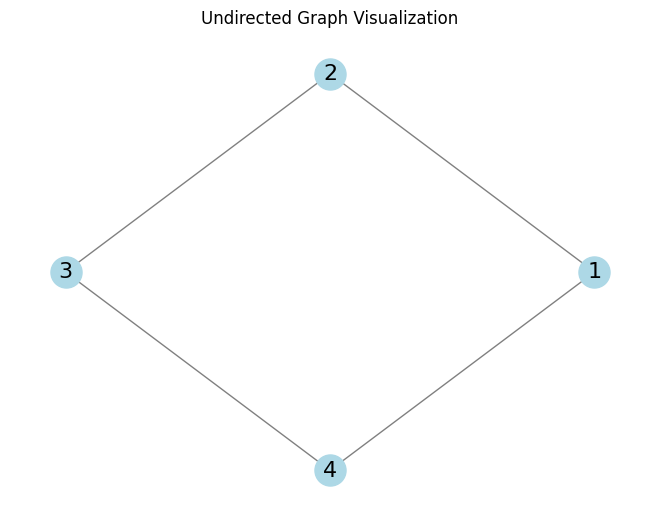

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

user = [1, 2, 3, 4]
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

G = nx.Graph()

G.add_nodes_from(user)

G.add_edges_from(edge)

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16)

# 显示图形
plt.title("Undirected Graph Visualization")
plt.show()


7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

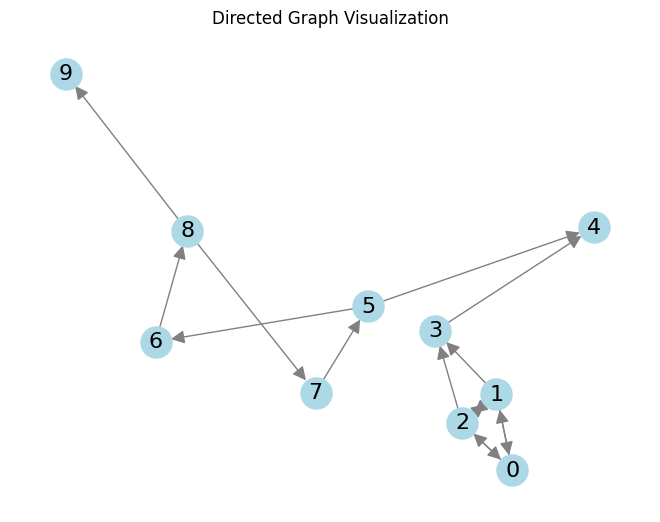

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()

G.add_nodes_from(users)

G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16, arrowstyle='-|>', arrowsize=20)

plt.title("Directed Graph Visualization")
plt.show()


8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

PageRank values: {0: 0.09499069584253748, 1: 0.10547659652084884, 2: 0.10547659652084884, 3: 0.09499069584253748, 4: 0.15931683334639937, 5: 0.1020112395832942, 6: 0.0785753675867465, 7: 0.0785753675867465, 8: 0.1020112395832942, 9: 0.0785753675867465}


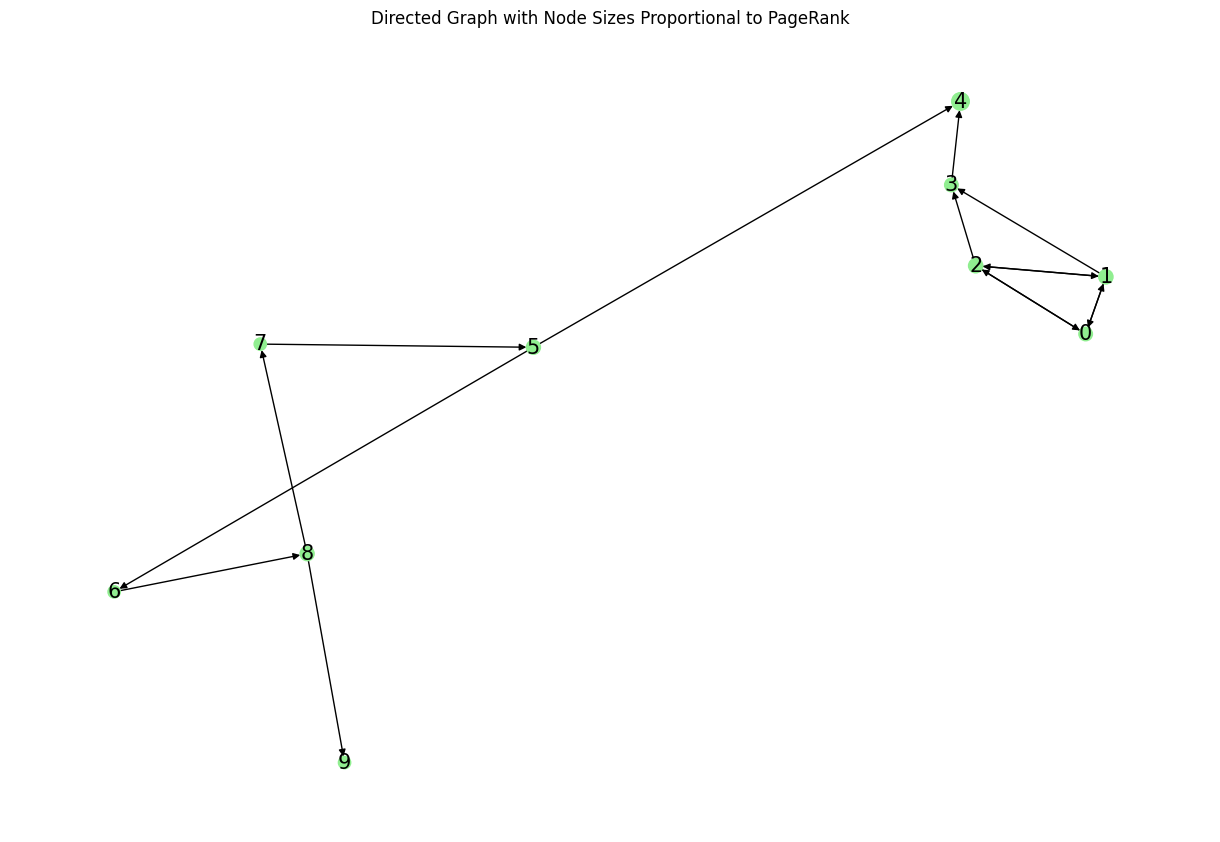

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
DG = nx.DiGraph()
DG.add_edges_from(edges)

pagerank = nx.pagerank(DG)
print("PageRank values:", pagerank)

node_sizes = [v * 1000 for v in pagerank.values()] 

pos = nx.spring_layout(DG)
plt.figure(figsize=(12, 8))
nx.draw(DG, pos, with_labels=True, node_color='lightgreen', edge_color='black', node_size=node_sizes, font_size=15, arrows=True)
plt.title("Directed Graph with Node Sizes Proportional to PageRank")
plt.show()
